<a href="https://colab.research.google.com/github/Puvi121/Puvi121/blob/main/sample_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline


### **Basic data type**

##**Basic dataframe operations**




In [ ]:
# Read in the dataset
patient = pd.read_csv('kidney_disease.csv')



In [ ]:
patient.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
patient.tail()

In [ ]:
patient.shape

In [ ]:
pd.pivot_table(patient, index=['rbc','ba'],
                        columns=['appet'], aggfunc=len)

age        al       ane       bgr        bp       ...  \
appet               good poor good poor good poor good poor good poor  ...   
rbc      ba                                                            ...   
abnormal notpresent   25   14   25   14   25   14   25   14   25   14  ...   
         present       4    4    4    4    4    4    4    4    4    4  ...   
normal   notpresent  169   18  169   18  169   18  169   18  169   18  ...   
         present       5    5    5    5    5    5    5    5    5    5  ...   

                      sc        sg       sod        su        wc       
appet               good poor good poor good poor good poor good poor  
rbc      ba                                                            
abnormal notpresent   25   14   25   14   25   14   25   14   25   14  
         present       4    4    4    4    4    4    4    4    4    4  
normal   notpresent  169   18  169   18  169   18  169   18  169   18  
         present       5    5    5    5    5    5    5    5    5    5  

[4 rows x 46 columns]

In [ ]:
pd.pivot_table(patient, 'id', index=['rbc','ba'],
                        columns=['appet'])

appet                      good        poor
rbc      ba                                
abnormal notpresent  123.520000  103.214286
         present     170.500000  179.750000
normal   notpresent  286.207101  131.833333
         present     162.600000   87.000000

In [ ]:
patient.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
patient.columns

## **Dataset summarization methods**

In [ ]:
# Print description of DataFrame

patient.describe()

In [ ]:
# print info of DataFrame
patient.info()

### **Missing value treatment**


In [ ]:
# Count missing values
#to identify missing or null values in your data.
# with boolean values [True,False]
patient.isnull().sum()

In [ ]:
# print number of count missing values
patient.isna().sum()

In [ ]:
# Fill NA with most common values
patient["rbc"].value_counts()

In [ ]:
patient.head(2)

In [ ]:
for col in patient.columns:
    print(col, ': ', len(patient[col].unique()), 'labels')

patient.isnull().sum()

### **Select/Indexing**


In [ ]:
patient.loc

In [ ]:
print(patient.loc[0])

In [ ]:
# label based indexing
patient.loc[:,["age","pc"]].head(2)

In [ ]:
patient.loc[:,["wc","pcc"]]
ac = patient.loc[:,"wc"]
type(ac)
ac

In [ ]:
patient.loc[:,["wc","pcc"]]


In [ ]:
patient.loc[:,"pc"]

In [ ]:
patient1=patient.loc[patient["age"]<5,["pc","pcc","ba",'dm','appet']].head(5)

patient1

In [ ]:
patient.iloc[:,0:3]

In [ ]:
## Positional Indexing
patient.iloc[0:4,[0,1]]

In [ ]:
patient.iloc[0:5,0:3]

### **Data Cleaning**

In [ ]:
# Remove the empty cells
patient.dropna()


In [ ]:
#Remove rows with a null in the "rbc" columns

patient.dropna(subset=["rbc"], inplace=True)

patient

In [ ]:
# Remove all rows with null values
patient.dropna(inplace=True)

patient

In [ ]:
#Replace only for specific column
patient['rbc'].fillna('normal', inplace=True)


In [ ]:
patient

In [ ]:
# Mean replace empty value
patient6 = patient["id"].mean()

patient["id"].fillna('patient6',inplace=True)

patient6
# the empty values from "id" was replaced with the mean: 199.5

In [ ]:
# Meidan  replace any empty values:
patient6 = patient["age"].median()

patient["age"].fillna('patient6',inplace=True)

patient6

# the empty values from "age" was replaced with the median: 55.0

In [ ]:
# Mode and replace  any empty values

patient6 = patient["age"].mode()

patient["age"].fillna('patient6',inplace=True)

patient6

### **Removing Duplicates**

In [ ]:
patient.duplicated()

In [ ]:
patient.drop_duplicates(inplace=True)

patient

### **Filtering**

In [ ]:
patient["bp"]>10

patient

In [ ]:
patient4 = patient.loc[patient["bp"] > 10,["bp"]]
patient4

In [ ]:
patient4= patient.loc[patient["bp"]>10,["dm","cad"]]
patient4.head(20)

### **Sorting**

In [ ]:
patient.sort_values(by=["sg"],ascending=False).head(5)

In [ ]:
patient.sort_values(by=["rbc","sg"],ascending=[True,False]).head(5)

In [ ]:
patient.head(2)

### **Groupby**

In [ ]:
# for each start loc find the mean and disease
patient.groupby("rbc")["al"].agg("mean").head()

In [ ]:
patient.groupby("pc")["su"].agg("mean")

In [ ]:
patient.groupby("pcc")["su"].mean()

In [ ]:
# for each start loc find the mean & the total disease

patient.groupby("appet")["su"].agg("mean","sum").head(10)

### **Conditionall adding columns**

In [ ]:
patient["kidney_disease"] = np.where(patient["al"]>1.2,"affected","non-affected")

In [ ]:
patient.head(2)

In [ ]:
patient["appet"].value_counts()

In [ ]:
patient["kidney_disease"].value_counts()

In [ ]:
patient.loc[patient["al"]>1.5].shape

### **Charts**

In [ ]:
patient.head(2)

### **Matplotlib**

### **Line Chart**

In [ ]:

patient.plot(kind='line')
plt.title('Line Chart')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

### **Histogram**

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'sg'}>, <Axes: title={'center': 'al'}>,
        <Axes: title={'center': 'su'}>],
       [<Axes: title={'center': 'bgr'}>, <Axes: title={'center': 'bu'}>,
        <Axes: title={'center': 'sc'}>],
       [<Axes: title={'center': 'sod'}>, <Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>]], dtype=object)

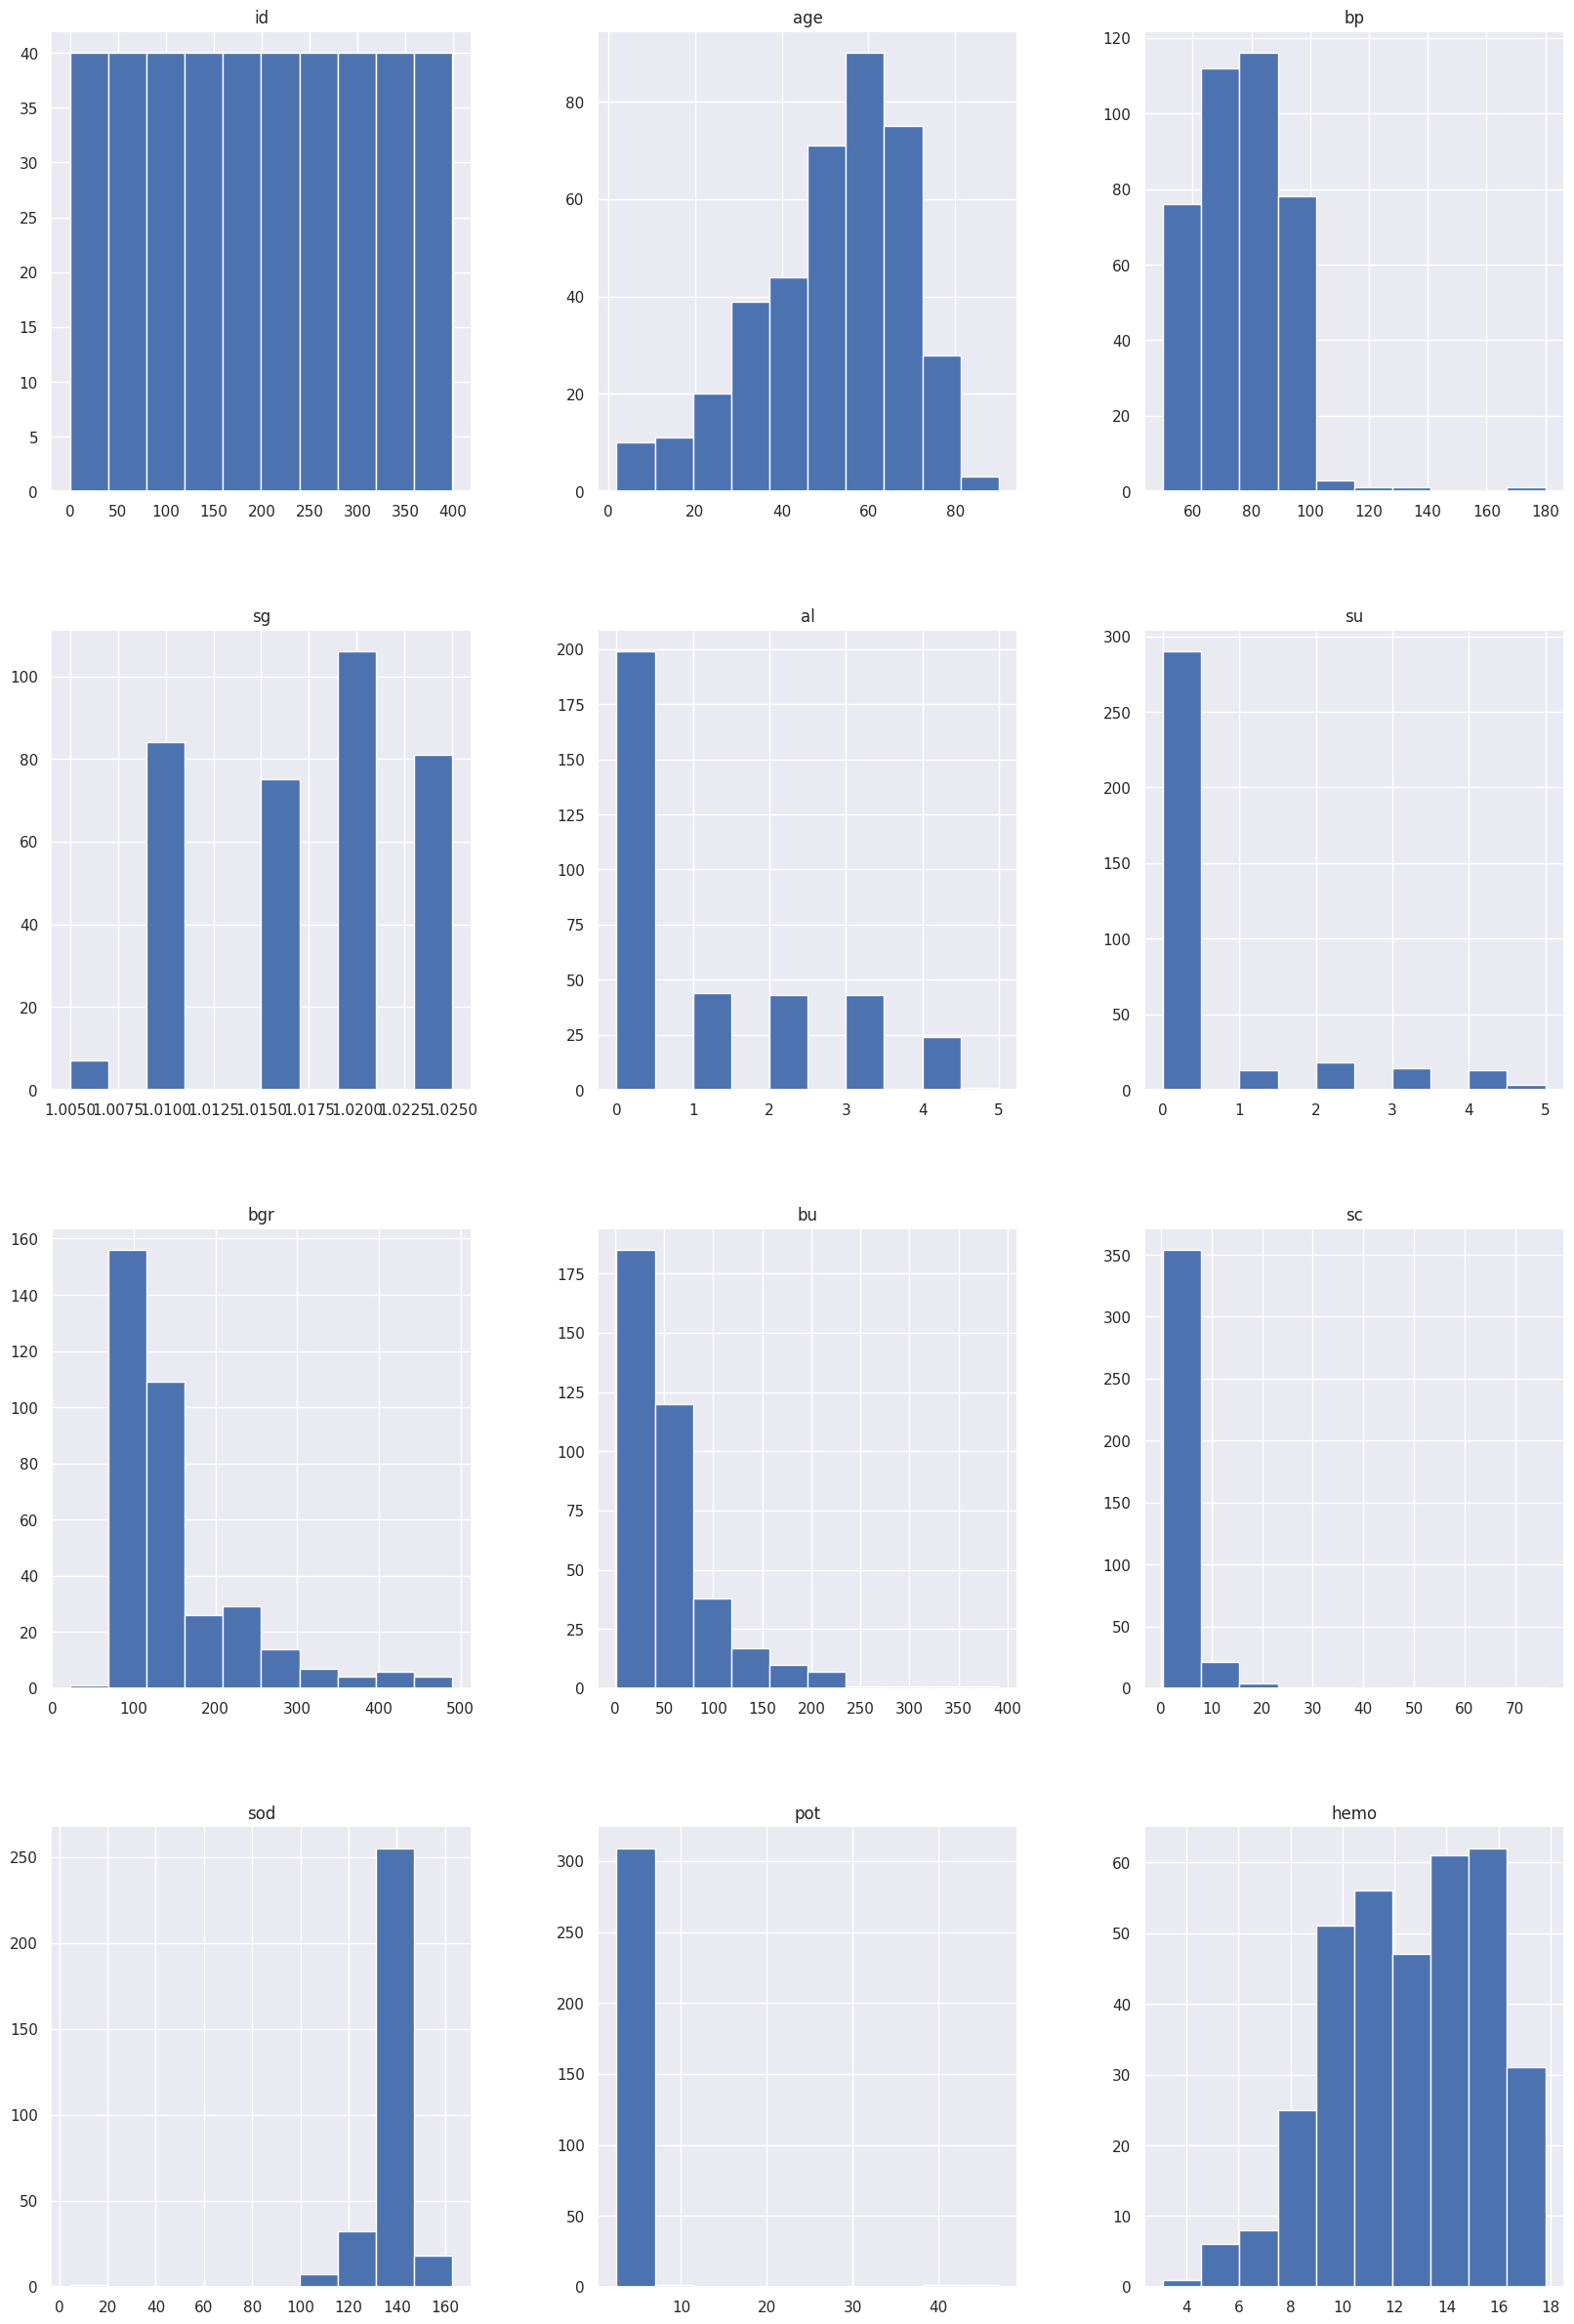

In [ ]:
patient.hist(figsize=(20,30))

In [ ]:
patient.hist(['age','dm','bgr'])
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')


### **Pie Chart**


In [ ]:
patient['appet'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart')


### **Box Plot**


In [ ]:
patient.plot(kind='box')
plt.title('Box Plot')
plt.ylabel('Values')


###**Scatter Plot**

In [ ]:
patient.plot(kind='scatter', x='age', y='al')
plt.title('Scatter Plot')
plt.xlabel('age')
plt.ylabel('al')


### **Seaborn**

###**bar chart**

In [ ]:
# How many values of different id
patient['appet'].value_counts()

# Distribution of age
sns.displot(patient['age'], bins=10)



In [ ]:
# Scatter plot
# reg plot
# resid plot
# kde plot
# hex plot
#kind: {'scatter',/'reg'/'resid'/'kde'/'hex'}
sns.jointplot(x='age', y='al', data=patient, kind='scatter')


### **Countplot**

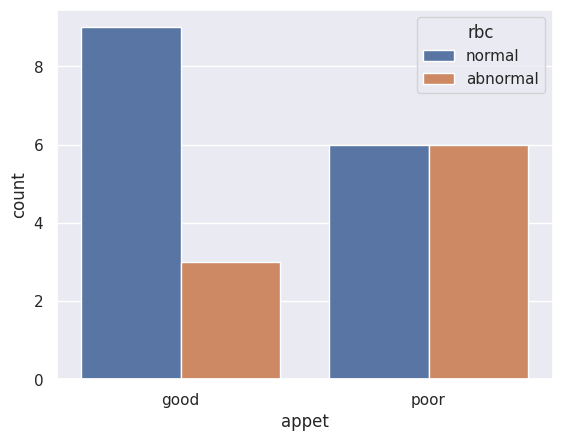

In [ ]:
#Count plot
sns.countplot(x = "appet", data = patient.head(50), hue = "rbc");

In [ ]:
# What are the different types of classification

plot = sns.countplot(x = "classification", data = patient)


###**pairplot**


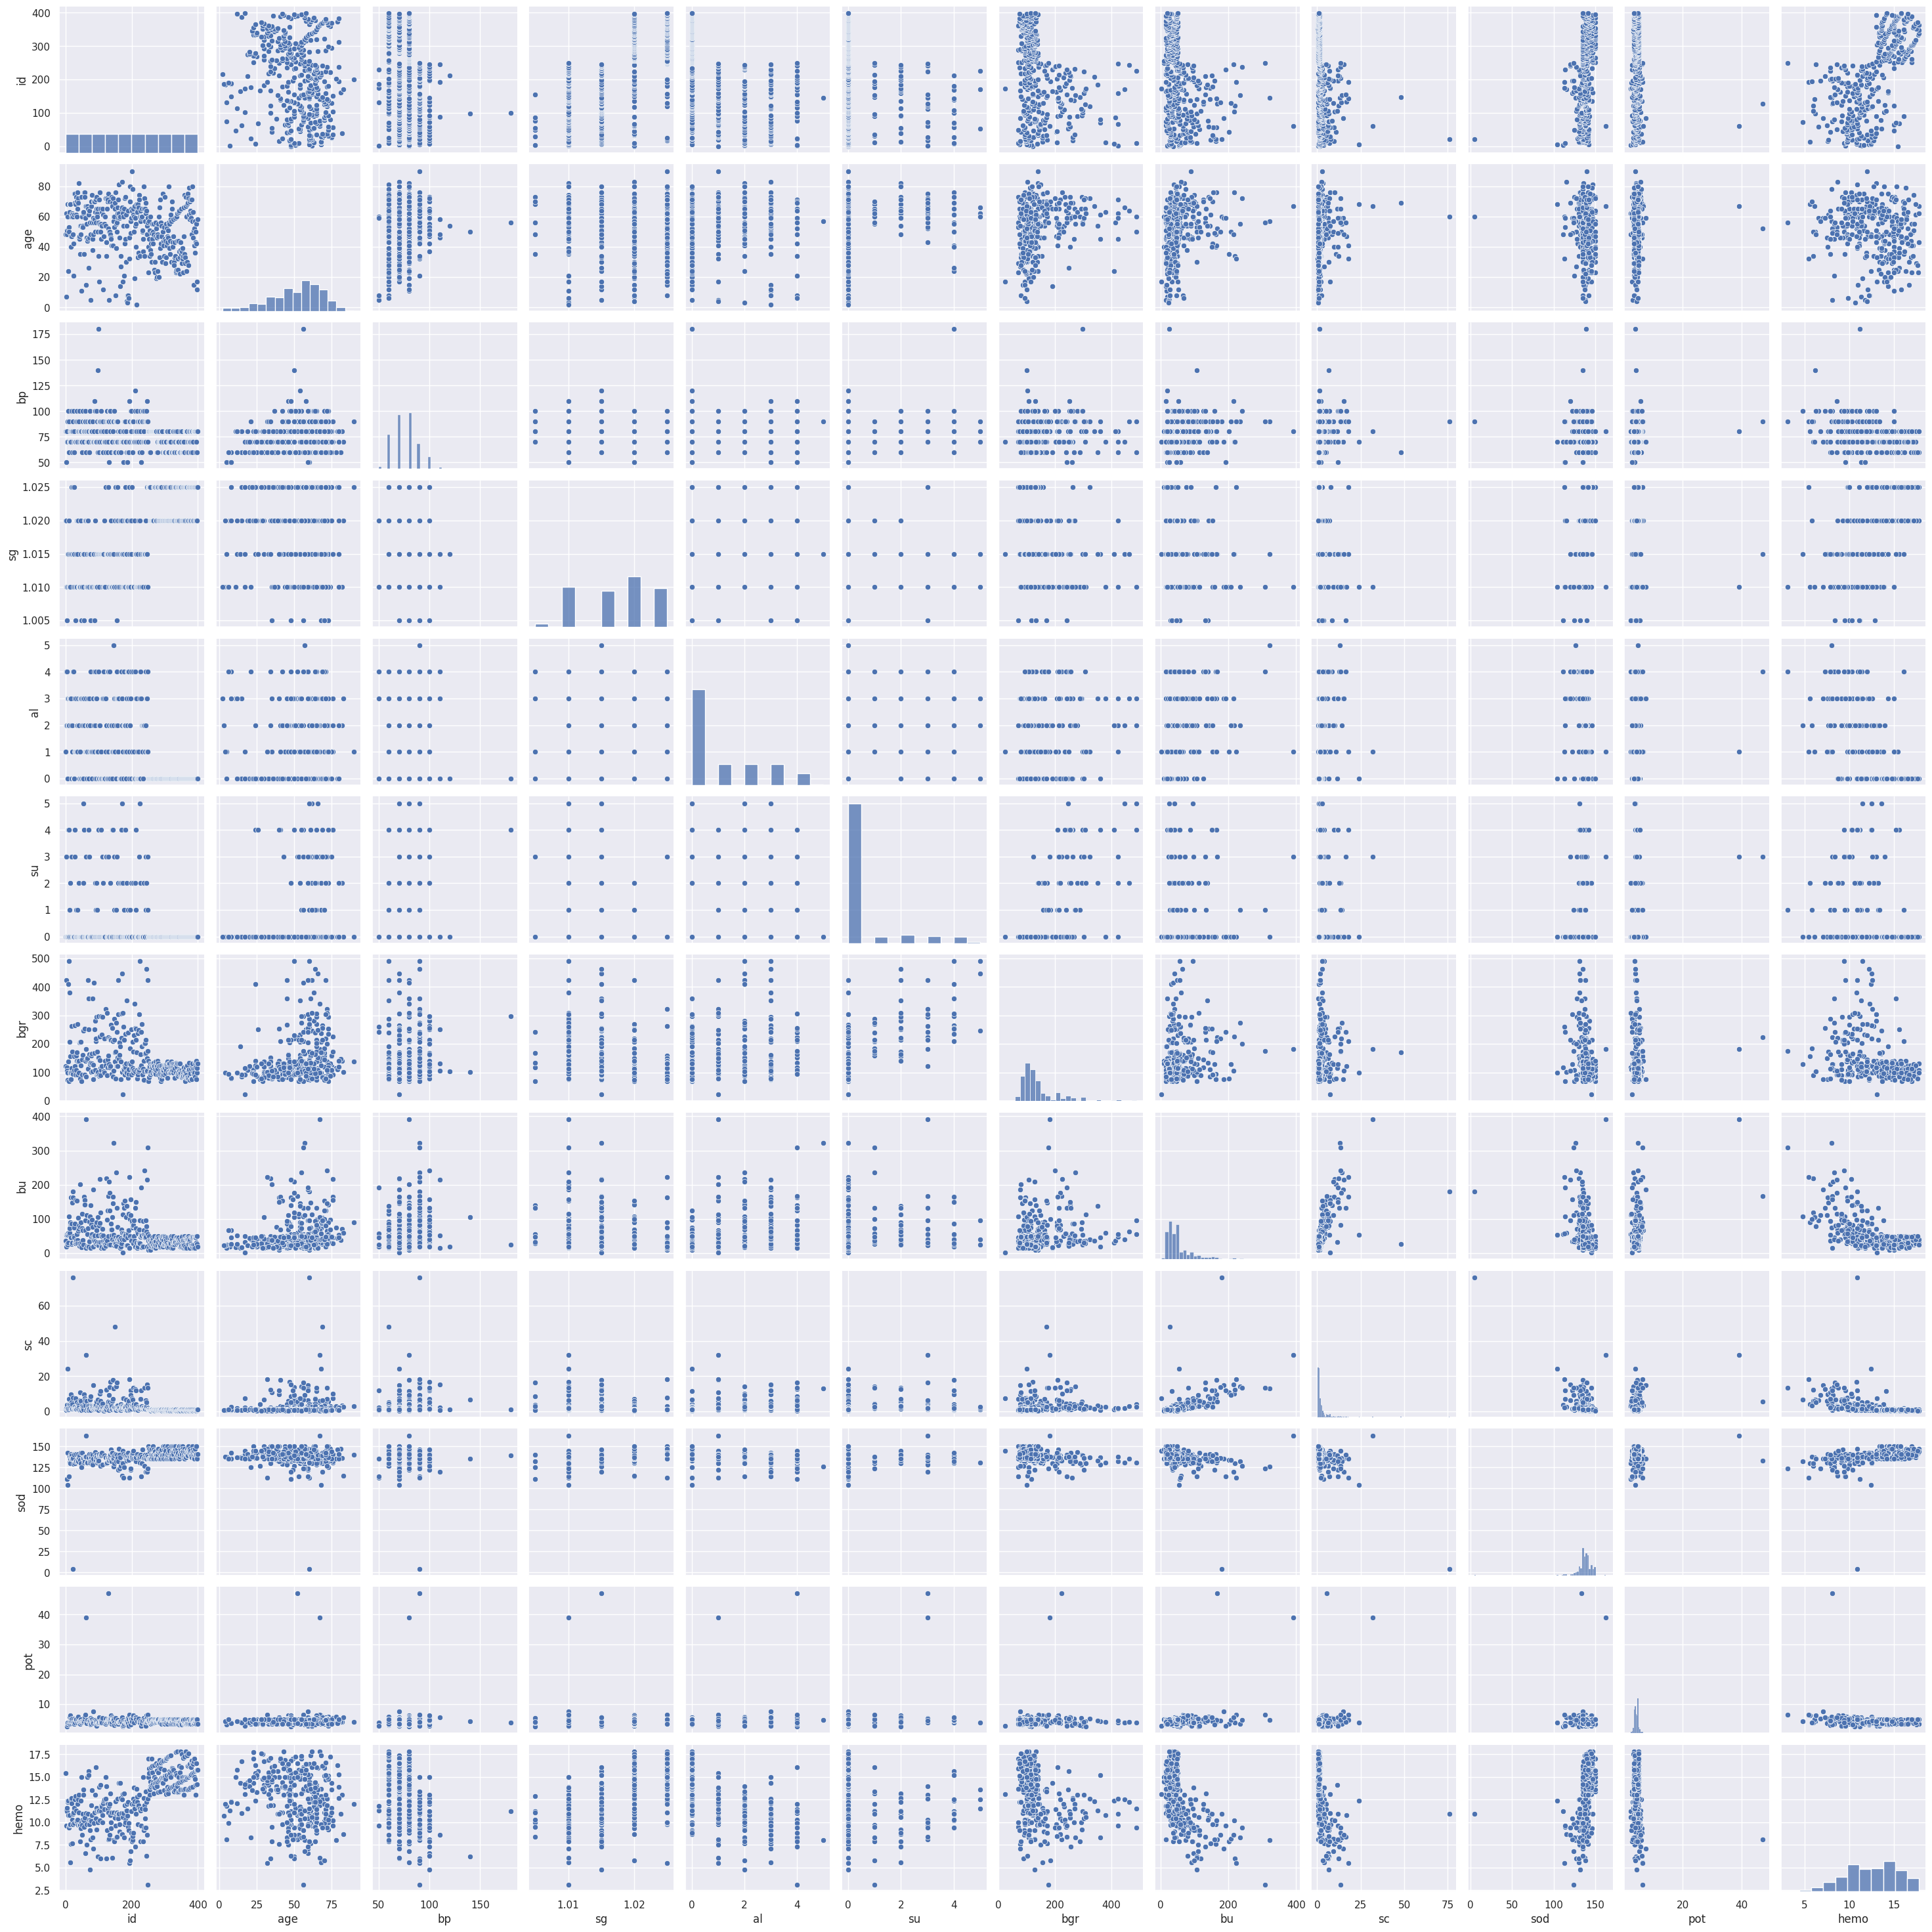

In [ ]:
sns.pairplot(patient)

In [ ]:
sns.pairplot(patient[['age','dm','bgr']])

###**pie chart**


In [ ]:
# Assuming x, y, and z are the column names in your DataFrame
x_column = 'age'
y_column = 'bp'
z_column = 'pc'

# Extracting data from the specified columns
x_values = patient[x_column].head(5)
y_values = patient[y_column].head(5)
z_values = patient[z_column].head(5)

# Concatenate the data into a single Series
combined_values = pd.concat([x_values, y_values, z_values])

# Counting the occurrences of each value
value_counts = combined_values.value_counts()

# Plotting the pie chart using Seaborn
plt.figure(figsize=(6,6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Values')


### **barplot**

In [ ]:
#barplot
sns.barplot(x='rbc', y='age', data=patient, hue=patient['appet'])


### **boxplot**

In [ ]:
#box plot
fig, axs = plt.subplots(figsize =(5,5))
sns.boxplot(x = "pc", y = "bp", data = patient.head(30), ax=axs);

In [ ]:
#boxplot
sns.boxplot(x='bp', y='age', data=patient, hue=patient['rbc'])

### **displot**

In [ ]:
# Visualization the distribution of the rating columns
sns.displot(patient['pc'],bins=20)
plt.title('Number of patient affected pc')


### **Heat Map**

In [ ]:
sns.heatmap(np.reshape(patient['sod'],(158,-158)))


In [ ]:
sns.displot(patient['age'], bins=10)


###**Find the number of unique values in classification columns**


In [ ]:
patient['classification'].unique()

###  **Missing values**
###**How many values of different id**

In [ ]:
patient['appet'].value_counts()

### **Print unique values of 'pc'**

In [ ]:
patient['pc'].unique()

### **Deal with trailing spaces**


In [ ]:
patient['pc'] = patient['pcc'].str.strip()
patient['pc'].unique()

###**print header of pc column**

In [ ]:
patient['pc'].head()

### **Visualize the rating column again**


In [ ]:
sns.distplot(patient['hemo'], bins = 20)
plt.show()

### **Isolate rows of hemo > 5.0**

In [ ]:
patient[patient['hemo'] > 5.0].head(n=10)

### **Visualization the missingness matrix on sorted values**


In [ ]:
msno.matrix(patient.sort_values(by='rc'))
plt.show()

###**Missingness barplot**


In [ ]:
msno.bar(patient)

###**Understanding DataFrame values in 'rc','hemo'**

In [ ]:
patient[patient['rc'].isna()].describe()

In [ ]:
patient[~patient['rc'].isna()].describe() #boolean value